In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [2]:
per_clf = Perceptron()
per_clf.fit(X, y)

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, per_clf.predict(X))

1.0

In [4]:
X = np.array([1., 2., 3., 4., 1., 2., 3.])
def softmax(x):
    e = np.exp(x)
    return e / np.sum(e)
y = softmax(X)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

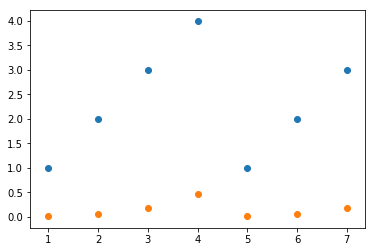

In [6]:
plt.scatter([1, 2, 3, 4, 5, 6, 7], X)
plt.scatter([1, 2, 3, 4, 5, 6, 7], y)

In [7]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [8]:
X_mnist, y_mnist = mnist['data'], mnist['target']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_mnist = scaler.fit_transform(X_mnist)

/Users/espe/Documents/Projekte/ML/Environment/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
y_mnist = np.array(y_mnist, dtype=int)
y_mnist

array([0, 0, 0, ..., 9, 9, 9])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist)

In [12]:
import tensorflow as tf
feature_cols = [tf.feature_column.numeric_column(key='pixels', shape=784, dtype=tf.float64)]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10f133050>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/3_/r7bglz4s7zb227bm56n7bb640000gn/T/tmp2p6X98', '_save_summary_steps': 100}


In [13]:
def train_input_fn(data, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(({ 'pixels': data }, labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [14]:
dnn_clf.train(input_fn=lambda:train_input_fn(X_train, y_train, 50), steps=40000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/3_/r7bglz4s7zb227bm56n7bb640000gn/T/tmp2p6X98/model.ckpt.
INFO:tensorflow:loss = 136.43394, step = 1
INFO:tensorflow:global_step/sec: 177.381
INFO:tensorflow:loss = 19.440563, step = 101 (0.566 sec)
INFO:tensorflow:global_step/sec: 398.755
INFO:tensorflow:loss = 6.368797, step = 201 (0.250 sec)
INFO:tensorflow:global_step/sec: 413.245
INFO:tensorflow:loss = 9.871121, step = 301 (0.242 sec)
INFO:tensorflow:global_step/sec: 401.492
INFO:tensorflow:loss = 4.994657, step = 401 (0.249 sec)
INFO:tensorflow:global_step/sec: 374.987
INFO:tensorflow:loss = 9.657606, step = 501 (0.268 sec)
INFO:tensorflow:global_step/sec: 375.333
INFO:tensorflow:loss = 16.20586, step = 601 (0.265 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 431.814
INFO:tensorflow:loss = 0.09972319, step = 8001 (0.232 sec)
INFO:tensorflow:global_step/sec: 436.306
INFO:tensorflow:loss = 0.13051936, step = 8101 (0.229 sec)
INFO:tensorflow:global_step/sec: 420.767
INFO:tensorflow:loss = 0.18532176, step = 8201 (0.237 sec)
INFO:tensorflow:global_step/sec: 416.457
INFO:tensorflow:loss = 0.017322762, step = 8301 (0.240 sec)
INFO:tensorflow:global_step/sec: 428.082
INFO:tensorflow:loss = 0.18588509, step = 8401 (0.234 sec)
INFO:tensorflow:global_step/sec: 434.768
INFO:tensorflow:loss = 0.07122564, step = 8501 (0.230 sec)
INFO:tensorflow:global_step/sec: 431.44
INFO:tensorflow:loss = 0.04335314, step = 8601 (0.231 sec)
INFO:tensorflow:global_step/sec: 439.562
INFO:tensorflow:loss = 0.15191483, step = 8701 (0.228 sec)
INFO:tensorflow:global_step/sec: 418.501
INFO:tensorflow:loss = 0.1330629, step = 8801 (0.238 sec)
INFO:tensorflow:global_step/sec: 442.298
INFO:tensorflow:loss = 0.006249956, step = 8901 (0.226 sec)


INFO:tensorflow:loss = 0.03316885, step = 16101 (0.230 sec)
INFO:tensorflow:global_step/sec: 393.82
INFO:tensorflow:loss = 0.02680485, step = 16201 (0.254 sec)
INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 0.028836526, step = 16301 (0.266 sec)
INFO:tensorflow:global_step/sec: 386.959
INFO:tensorflow:loss = 0.0352062, step = 16401 (0.258 sec)
INFO:tensorflow:global_step/sec: 408.499
INFO:tensorflow:loss = 0.011774765, step = 16501 (0.246 sec)
INFO:tensorflow:global_step/sec: 430.799
INFO:tensorflow:loss = 0.37615222, step = 16601 (0.231 sec)
INFO:tensorflow:global_step/sec: 399.235
INFO:tensorflow:loss = 0.055354744, step = 16701 (0.251 sec)
INFO:tensorflow:global_step/sec: 364.116
INFO:tensorflow:loss = 0.03663358, step = 16801 (0.275 sec)
INFO:tensorflow:global_step/sec: 414.714
INFO:tensorflow:loss = 0.062089555, step = 16901 (0.240 sec)
INFO:tensorflow:global_step/sec: 424.222
INFO:tensorflow:loss = 0.08862812, step = 17001 (0.235 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 418.722
INFO:tensorflow:loss = 0.062410805, step = 24201 (0.238 sec)
INFO:tensorflow:global_step/sec: 419.93
INFO:tensorflow:loss = 0.011064316, step = 24301 (0.238 sec)
INFO:tensorflow:global_step/sec: 417.183
INFO:tensorflow:loss = 0.0064098705, step = 24401 (0.240 sec)
INFO:tensorflow:global_step/sec: 421.761
INFO:tensorflow:loss = 0.019838426, step = 24501 (0.237 sec)
INFO:tensorflow:global_step/sec: 252.661
INFO:tensorflow:loss = 0.011260208, step = 24601 (0.396 sec)
INFO:tensorflow:global_step/sec: 423.821
INFO:tensorflow:loss = 0.009664449, step = 24701 (0.236 sec)
INFO:tensorflow:global_step/sec: 421.486
INFO:tensorflow:loss = 0.08594186, step = 24801 (0.238 sec)
INFO:tensorflow:global_step/sec: 430.593
INFO:tensorflow:loss = 0.021187536, step = 24901 (0.232 sec)
INFO:tensorflow:global_step/sec: 364.655
INFO:tensorflow:loss = 0.003077016, step = 25001 (0.275 sec)
INFO:tensorflow:global_step/sec: 375.282
INFO:tensorflow:loss = 0.008788571, step =

INFO:tensorflow:loss = 0.010691492, step = 32201 (0.246 sec)
INFO:tensorflow:global_step/sec: 399.909
INFO:tensorflow:loss = 0.0065976437, step = 32301 (0.251 sec)
INFO:tensorflow:global_step/sec: 405.009
INFO:tensorflow:loss = 0.018310245, step = 32401 (0.246 sec)
INFO:tensorflow:global_step/sec: 390.491
INFO:tensorflow:loss = 0.0156558, step = 32501 (0.257 sec)
INFO:tensorflow:global_step/sec: 426.123
INFO:tensorflow:loss = 0.0066957623, step = 32601 (0.233 sec)
INFO:tensorflow:global_step/sec: 413.531
INFO:tensorflow:loss = 0.021776168, step = 32701 (0.242 sec)
INFO:tensorflow:global_step/sec: 405.037
INFO:tensorflow:loss = 0.021407425, step = 32801 (0.248 sec)
INFO:tensorflow:global_step/sec: 413.758
INFO:tensorflow:loss = 0.009957794, step = 32901 (0.241 sec)
INFO:tensorflow:global_step/sec: 389.628
INFO:tensorflow:loss = 0.0019716742, step = 33001 (0.258 sec)
INFO:tensorflow:global_step/sec: 375.298
INFO:tensorflow:loss = 0.004390349, step = 33101 (0.267 sec)
INFO:tensorflow:glob

In [15]:
def predict_input_fn(data):
    dataset = tf.data.Dataset.from_tensor_slices({ 'pixels': data})
    return dataset
predictions = dnn_clf.predict(input_fn=lambda:train_input_fn(X_test, y_test, 50))

In [ ]:
from sklearn.metrics import accuracy_score

y_preds = np.zeros(len(X_test))
i = 0
for pd in predictions:
    y_preds[i] = pd['class_ids'][0]
accuracy_score(y_test, y_preds)

In [4]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

In [5]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2. / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(z)
        else:
            return z

In [6]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='outputs')

In [7]:
with tf.name_scope('loss'):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(cross_entropy, name='loss')

In [8]:
learning_rate = 0.01
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [9]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [10]:
init = tf.global_variables_initializer()

In [11]:
saver = tf.train.Saver()

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
n_epochs = 40
batch_size = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print epoch, 'train acc:', acc_train, ', test acc:', acc_test
    save_path = saver.save(sess, './my_mnist_model.ckpt')

0 train acc: 0.94 , test acc: 0.9094
1 train acc: 0.92 , test acc: 0.9258
2 train acc: 0.96 , test acc: 0.935
3 train acc: 0.96 , test acc: 0.9417
4 train acc: 0.94 , test acc: 0.948
5 train acc: 0.92 , test acc: 0.9497
6 train acc: 0.96 , test acc: 0.9519
7 train acc: 1.0 , test acc: 0.9556
8 train acc: 0.96 , test acc: 0.958
9 train acc: 0.98 , test acc: 0.9596
10 train acc: 0.98 , test acc: 0.9612
11 train acc: 0.96 , test acc: 0.9632
12 train acc: 1.0 , test acc: 0.9624
13 train acc: 0.96 , test acc: 0.966
14 train acc: 0.96 , test acc: 0.9673
15 train acc: 0.98 , test acc: 0.9677
16 train acc: 1.0 , test acc: 0.9682
17 train acc: 1.0 , test acc: 0.9686
18 train acc: 0.98 , test acc: 0.9696
19 train acc: 1.0 , test acc: 0.9694
20 train acc: 0.98 , test acc: 0.97
21 train acc: 1.0 , test acc: 0.9697
22 train acc: 1.0 , test acc: 0.9714
23 train acc: 1.0 , test acc: 0.9709
24 train acc: 0.98 , test acc: 0.972
25 train acc: 0.98 , test acc: 0.9729
26 train acc: 1.0 , test acc: 0.9725
